In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import hamming_loss, accuracy_score, jaccard_score

from sklearn.svm import SVC

In [2]:
df1 = pd.read_csv(r'C:\Users\avata\Desktop\New folder\ML\Class Activity\weatherAUS.csv')

df = df1.copy()

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

## Data Cleaning and Preprocessing


•	Missing Data Handling: Identify and handle missing values in critical columns such as RainTomorrow, Rainfall, Humidity9am, and WindGustSpeed using appropriate techniques like imputation or removal.

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.shape

(145460, 23)

In [8]:
df.duplicated().sum()

0

<Axes: >

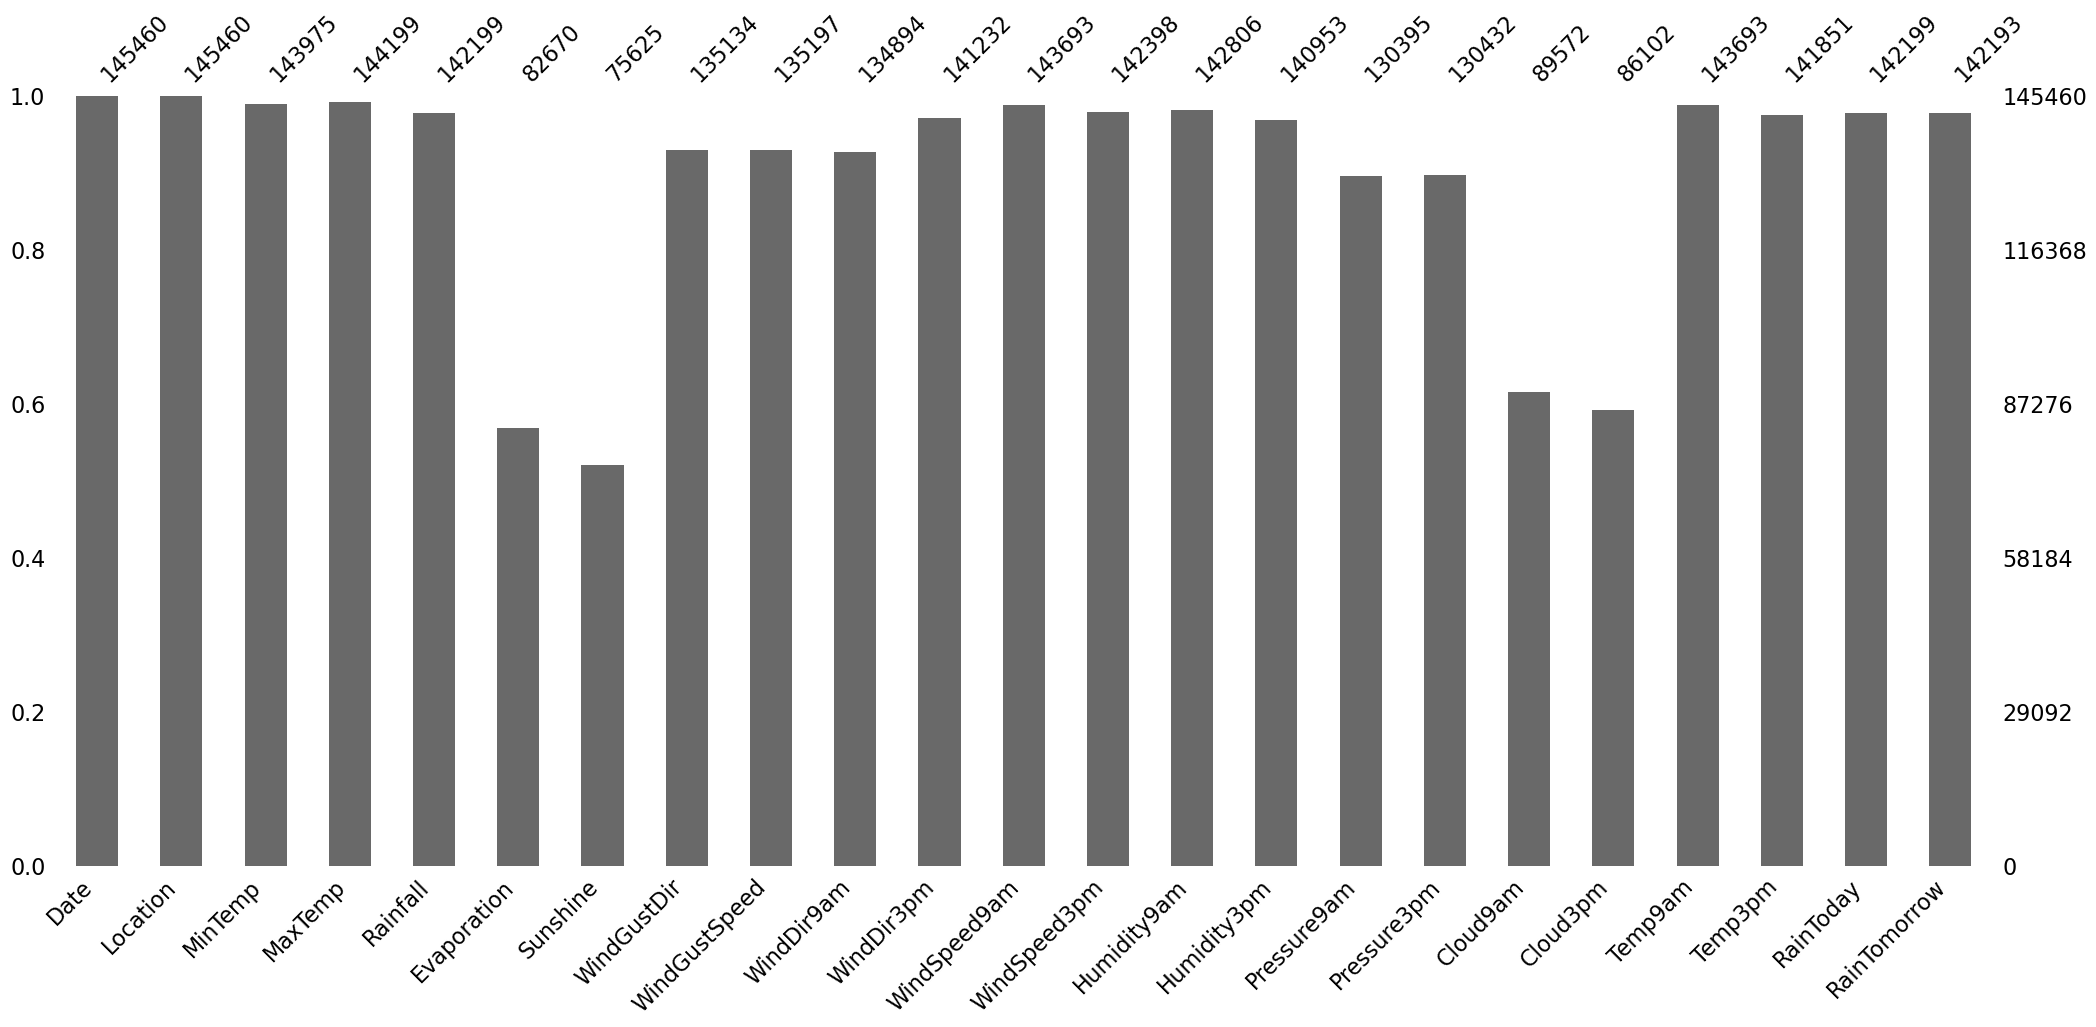

In [9]:
bar = msno.bar(df)
bar

<Axes: >

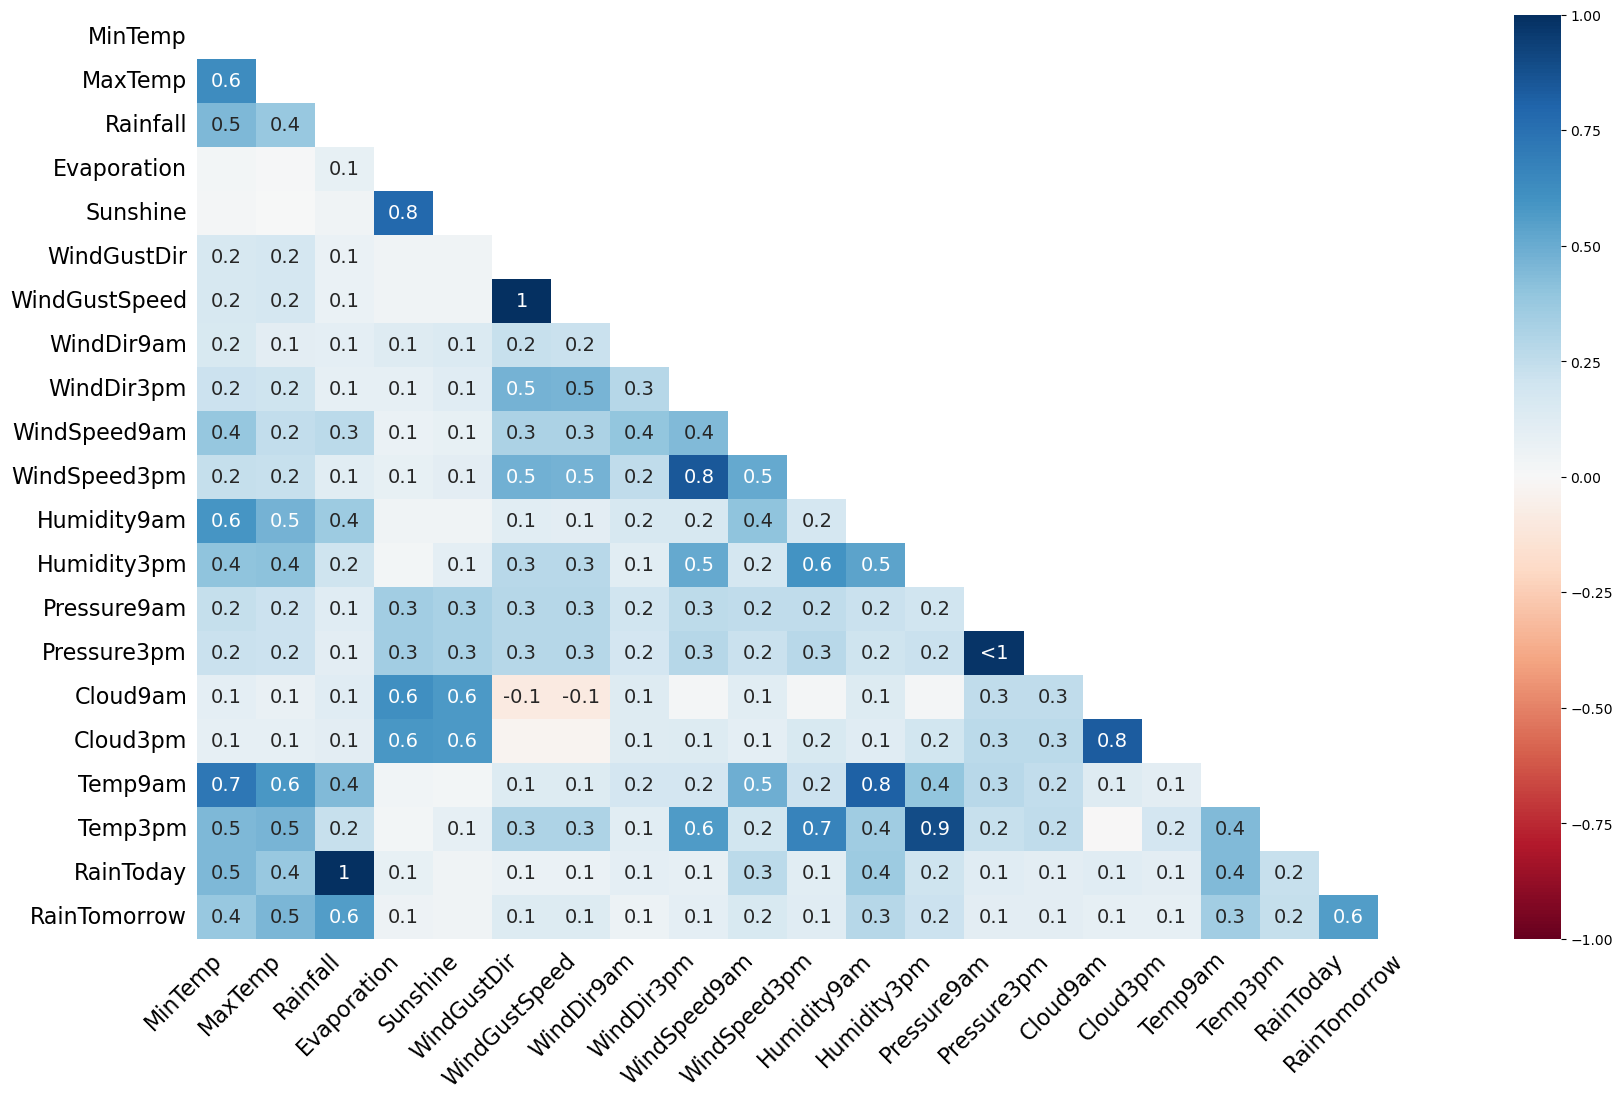

In [10]:
msno.heatmap(df)

In [11]:
df.dropna(subset = ['Evaporation'], inplace = True)
df.dropna(subset = ['Sunshine'], inplace = True)
df.dropna(subset = ['Cloud3pm'], inplace = True)
df.dropna(subset = ['WindGustDir'], inplace = True)
df.dropna(subset = ['WindDir9am'], inplace = True)
df.dropna(subset = ['Cloud9am'], inplace = True)
df.dropna(subset = ['WindDir3pm'], inplace = True)
df.dropna(subset = ['Humidity9am'], inplace = True)
df.dropna(subset = ['RainTomorrow'], inplace = True)
df.dropna(subset = ['Pressure9am'], inplace = True)
df.dropna(subset = ['RainToday'], inplace = True)
df.dropna(subset = ['Rainfall'], inplace = True)
df.dropna(subset = ['Humidity3pm'], inplace = True)
df.dropna(subset = ['MinTemp'], inplace = True)
df.dropna(subset = ['Pressure3pm'], inplace = True)
df.dropna(subset = ['MaxTemp'], inplace = True)



In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df.shape

(56420, 23)

In [14]:
df.isnull().mean() * 100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [15]:
df.shape

(56420, 23)

### Data Type Conversion: 

Convert date and categorical variables to appropriate formats. The date might be segmented into year, month, and day components for more detailed analysis.

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [18]:
# df['RainToday'].astype('category')
# df['RainTomorrow'].astype('category')

In [19]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Year                      int32
Month                     int32
Day                       int32
dtype: object

### Outlier Detection: 

Examine the data for any outliers and handle them as necessary
to avoid skewed model results.

In [20]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
Year                      int32
Month                     int32
Day                       int32
dtype: object

In [22]:
import numpy as np

# Select numerical columns for outlier detection
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                     'Temp9am', 'Temp3pm']

# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(lambda x: np.abs((x - x.mean()) / x.std()))

# Define threshold for outliers
threshold = 3

# Identify outliers for each column
outliers_by_column = z_scores > threshold

# Count outliers in each column
num_outliers_by_column = outliers_by_column.sum()

# Print columns with outliers and the number of outliers in each column
print("Columns with outliers:")
for col, num_outliers in num_outliers_by_column.items():
    if num_outliers > 0:
        print(f"{col}: {num_outliers} outliers")


Columns with outliers:
MinTemp: 2 outliers
MaxTemp: 17 outliers
Rainfall: 1162 outliers
Evaporation: 495 outliers
WindGustSpeed: 636 outliers
WindSpeed9am: 629 outliers
WindSpeed3pm: 377 outliers
Humidity9am: 217 outliers
Pressure9am: 234 outliers
Pressure3pm: 213 outliers
Temp9am: 5 outliers
Temp3pm: 24 outliers


In [23]:
 from scipy.stats.mstats import winsorize

# Apply winsorization to 'Rainfall' column
df['Rainfall_winsorized'] = winsorize(df['Rainfall'], limits=[0.05, 0.05])

 # Compare the number of outliers before and after winsorization
outliers_before = df['Rainfall'].size - df['Rainfall'].between(df['Rainfall'].quantile(0.05), df['Rainfall'].quantile(0.95)).sum()
outliers_after = df['Rainfall_winsorized'].size - df['Rainfall_winsorized'].between(df['Rainfall_winsorized'].quantile(0.05), df['Rainfall_winsorized'].quantile(0.95)).sum()

print("Number of outliers before winsorization:", outliers_before)
print("Number of outliers after winsorization:", outliers_after)


Number of outliers before winsorization: 2798
Number of outliers after winsorization: 0


C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [24]:
# from scipy.stats.mstats import winsorize

# # Columns with outliers
# columns_with_outliers = {
#     'MinTemp': 2,
#     'MaxTemp': 17,
#     'Rainfall': 1162,
#     'Evaporation': 495,
#     'WindGustSpeed': 636,
#     'WindSpeed9am': 629,
#     'WindSpeed3pm': 377,
#     'Humidity9am': 217,
#     'Pressure9am': 234,
#     'Pressure3pm': 213,
#     'Temp9am': 5,
#     'Temp3pm': 24
# }

# # Apply winsorization to each column with outliers
# for col, threshold in columns_with_outliers.items():
#     if col in df.columns:  # Check if column exists in DataFrame
#         winsorized_col = winsorize(df[col], limits=[0.05, 0.05])  # Winsorize the column
#         df[col] = winsorized_col  # Update the original DataFrame column with winsorized values

# # Compare the number of outliers before and after winsorization for each column
# for col, threshold in columns_with_outliers.items():
#     outliers_before = df[col].size - np.count_nonzero((df[col] < df[col].quantile(0.05)) | (df[col] > df[col].quantile(0.95)))
#     outliers_after = df[col].size - np.count_nonzero((df[col] < np.quantile(df[col], 0.05)) | (df[col] > np.quantile(df[col], 0.95)))

#     print("Column:", col)
#     print("Number of outliers before winsorization:", outliers_before)
#     print("Number of outliers after winsorization:", outliers_after)
#     print()


Column: MinTemp
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420



C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

Column: MaxTemp
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: Rainfall
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: Evaporation
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: WindGustSpeed
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: WindSpeed9am
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: WindSpeed3pm
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: Humidity9am
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: Pressure9am
Number of outliers before winsorization: 56420
Number of outliers after winsorization: 56420

Column: Pressure3pm
Number of outliers before winsorization: 56420
Number of outliers after

C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\avata\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

In [25]:
# numerical_cols = df.select_dtypes(include=['number'])
# def detect_outliers_z_score(df,threshold=3):
#     z_scores=(numerical_cols-numerical_cols.mean())/numerical_cols.std()
#     outliers = (np.abs(z_scores)>threshold).any(axis=1)
#     return outliers

# outlier_indices = df.index[outliers].tolist()
# print('Index of rows with outliers:',outlier_indices)
# print('Count of Outliers:',len(outlier_indices))

# rom scipy.stats import zscore
# # To Remove Outliers
# def remove_outliers(df,threshold=3):
#     z_scores=zscore(numerical_cols)
#     filtered_data = df[np.abs(z_scores)<=threshold]
#     return filtered_data
# updated_df = remove_outliers(df)
# df['MinTemp']=updated_df['MinTemp']




# Outlier detection

In [26]:
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Rainfall'], bins=30, kde=True)
# plt.title('Distribution of Winsorized Rainfall')
# plt.xlabel('Rainfall')
# plt.ylabel('Frequency')
# plt.show()





# plt.figure(figsize=(8, 6))
# sns.histplot(df['Rainfall_winsorized'], bins=30, kde=True)
# plt.title('Distribution of Winsorized Rainfall')
# plt.xlabel('Rainfall')
# plt.ylabel('Frequency')
# plt.show()


In [27]:
# # sns.boxplot(df1['MinTemp'])

# plt.figure(figsize=(8, 6))
# sns.histplot(df['MinTemp'], bins=30, kde=True)
# plt.title('Distribution of Winsorized Rainfall')
# plt.xlabel('Rainfall')
# plt.ylabel('Frequency')
# plt.show()

Treating outliers depends on several factors, including the nature of the data, the presence of genuine outliers versus data errors, and the requirements of your analysis or modeling task. Here are some common approaches to treat outliers:

- Data Transformation: Transforming the data using mathematical operations like log, square root, or reciprocal transformation can sometimes mitigate the effect of outliers.
- Winsorization: Winsorization involves replacing extreme values with less extreme values. You can set a threshold (e.g., 95th or 99th percentile) and replace values beyond that threshold with the value at the threshold.
- Trimming: Trimming involves removing a certain percentage of data points from the tails of the distribution. You can remove a fixed percentage of extreme values from both ends of the distribution.
- Imputation: If the outliers are due to data errors or missing values, you can impute them with a sensible value, such as the mean, median, or mode of the distribution.
- Model-based Detection and Removal: You can use statistical models to detect outliers and remove them from the dataset.
- Algorithm Selection: Some machine learning algorithms are robust to outliers (e.g., tree-based models), while others are sensitive to them (e.g., linear regression). Choosing an appropriate algorithm can sometimes mitigate the impact of outliers.

Here's a generalized example of how you could apply winsorization to the 'Rainfall' column using the scipy.stats.mstats.winsorize() function:

In [28]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Transpose the data for vertical orientation
# plt.figure(figsize=(8, 6))
# sns.boxplot(y=df['WindGustSpeed'])
# plt.title('Box Plot of WindGustSpeed')
# plt.ylabel('WindGustSpeed')
# plt.xlabel('Frequency')
# plt.show()


## 2. Feature Engineering

 Weather Change Indicators: Create features like temperature change from morning
to afternoon (Temp3pm - Temp9am) and similar metrics for humidity and pressure.

In [29]:
df['TempChange'] = df['Temp3pm'] - df['Temp9am']
df['HumidityChange'] = df['Humidity3pm'] - df['Humidity9am']
df['PressureChange'] = df['Pressure3pm'] - df['Pressure9am']

## 3. Model Development


Building the Model: Use the scikit-learn library to implement a Decision Tree
classifier. Start with default settings to establish a baseline performance.

In [30]:
print(df.info())  # This will display the summary information of your DataFrame including the new columns


<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 56420 non-null  datetime64[ns]
 1   Location             56420 non-null  object        
 2   MinTemp              56420 non-null  float64       
 3   MaxTemp              56420 non-null  float64       
 4   Rainfall             56420 non-null  float64       
 5   Evaporation          56420 non-null  float64       
 6   Sunshine             56420 non-null  float64       
 7   WindGustDir          56420 non-null  object        
 8   WindGustSpeed        56420 non-null  float64       
 9   WindDir9am           56420 non-null  object        
 10  WindDir3pm           56420 non-null  object        
 11  WindSpeed9am         56420 non-null  float64       
 12  WindSpeed3pm         56420 non-null  float64       
 13  Humidity9am          56420 non-n

In [31]:
df.dtypes

Date                   datetime64[ns]
Location                       object
MinTemp                       float64
MaxTemp                       float64
Rainfall                      float64
Evaporation                   float64
Sunshine                      float64
WindGustDir                    object
WindGustSpeed                 float64
WindDir9am                     object
WindDir3pm                     object
WindSpeed9am                  float64
WindSpeed3pm                  float64
Humidity9am                   float64
Humidity3pm                   float64
Pressure9am                   float64
Pressure3pm                   float64
Cloud9am                      float64
Cloud3pm                      float64
Temp9am                       float64
Temp3pm                       float64
RainToday                      object
RainTomorrow                   object
Year                            int32
Month                           int32
Day                             int32
Rainfall_win

In [32]:
X = df.drop(columns=['RainToday', 'RainTomorrow','Date','Temp3pm','Temp9am','Humidity3pm','Humidity9am','Pressure3pm','Pressure9am']).values
Y = df[['RainToday', 'RainTomorrow']].values

In [34]:
print(Y)

[['No' 'No']
 ['No' 'No']
 ['No' 'No']
 ...
 ['No' 'No']
 ['No' 'No']
 ['No' 'No']]


In [35]:
print(X[:, [0, 6, 8, 9]])

[['Cobar' 'SSW' 'ENE' 'SW']
 ['Cobar' 'S' 'SSE' 'SSE']
 ['Cobar' 'NNE' 'NNE' 'NNW']
 ...
 ['Darwin' 'E' 'E' 'W']
 ['Darwin' 'ESE' 'SE' 'NNW']
 ['Darwin' 'ENE' 'ENE' 'NNW']]


In [36]:
df.shape

(56420, 30)

In [37]:
X[:, [0, 6, 8, 9]]

array([['Cobar', 'SSW', 'ENE', 'SW'],
       ['Cobar', 'S', 'SSE', 'SSE'],
       ['Cobar', 'NNE', 'NNE', 'NNW'],
       ...,
       ['Darwin', 'E', 'E', 'W'],
       ['Darwin', 'ESE', 'SE', 'NNW'],
       ['Darwin', 'ENE', 'ENE', 'NNW']], dtype=object)

In [38]:
print(X[:, [0, 6, 8, 9]])

[['Cobar' 'SSW' 'ENE' 'SW']
 ['Cobar' 'S' 'SSE' 'SSE']
 ['Cobar' 'NNE' 'NNE' 'NNW']
 ...
 ['Darwin' 'E' 'E' 'W']
 ['Darwin' 'ESE' 'SE' 'NNW']
 ['Darwin' 'ENE' 'ENE' 'NNW']]


In [39]:
# labelencoder = LabelEncoder()

# X[:,0] = labelencoder.fit_transform(X[:,0])
# X[:,6] = labelencoder.fit_transform(X[:,6])
# X[:,8] = labelencoder.fit_transform(X[:,8])
# X[:,9] = labelencoder.fit_transform(X[:,9])
# print(X[:, [0, 6, 8, 9]])
# cols=[0, 6, 8, 9]
# onehot_encoder = OneHotEncoder(categories='auto',sparse_output=False)
# X_encoded = onehot_encoder.fit_transform(X[:,cols])
# print(X[:, [0, 6, 8, 9]])
# X = np.delete(X,cols,axis=1)
# X = np.concatenate((X,X_encoded),axis=1)

In [40]:
X

array([['Cobar', 17.9, 35.2, ..., 6.799999999999997, -19.0,
        -1.8999999999999773],
       ['Cobar', 18.4, 28.9, ..., 6.699999999999999, -24.0,
        -0.7999999999999545],
       ['Cobar', 19.4, 35.5, ..., 5.099999999999998, -20.0,
        -3.099999999999909],
       ...,
       ['Darwin', 20.7, 32.8, ..., 7.300000000000001, -23.0, -3.5],
       ['Darwin', 19.5, 31.8, ..., 4.399999999999999, -4.0,
        -4.199999999999932],
       ['Darwin', 20.2, 31.7, ..., 5.600000000000001, -41.0,
        -4.199999999999932]], dtype=object)

In [41]:
# Apply label encoding to the selected columns
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])
X[:, 6] = label_encoder.fit_transform(X[:, 6])
X[:, 8] = label_encoder.fit_transform(X[:, 8])
X[:, 9] = label_encoder.fit_transform(X[:, 9])
print(X[:, [0, 6, 8, 9]])
# Apply one-hot encoding to the label-encoded columns
onehot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
X_encoded = onehot_encoder.fit_transform(X[:, [0, 6, 8, 9]])
print(X_encoded)
# Replace the original columns with the one-hot encoded columns
X = np.delete(X, [0, 6, 8, 9], axis=1)
X = np.concatenate((X, X_encoded), axis=1)
print(X)

[[4 11 1 12]
 [4 8 10 10]
 [4 5 5 6]
 ...
 [6 0 0 13]
 [6 2 9 6]
 [6 1 1 6]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[17.9 35.2 0.0 ... 0.0 0.0 0.0]
 [18.4 28.9 0.0 ... 0.0 0.0 0.0]
 [19.4 35.5 0.0 ... 0.0 0.0 0.0]
 ...
 [20.7 32.8 0.0 ... 1.0 0.0 0.0]
 [19.5 31.8 0.0 ... 0.0 0.0 0.0]
 [20.2 31.7 0.0 ... 0.0 0.0 0.0]]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

In [45]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                                   max_depth=3, min_samples_leaf=5)

In [46]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [47]:
y_pred_en = clf_entropy.predict(X_test)

In [48]:
print(y_pred_en)
print(y_test)

[['No' 'No']
 ['No' 'No']
 ['Yes' 'No']
 ...
 ['No' 'No']
 ['Yes' 'No']
 ['Yes' 'No']]
[['No' 'Yes']
 ['No' 'No']
 ['Yes' 'No']
 ...
 ['No' 'No']
 ['Yes' 'No']
 ['Yes' 'No']]


In [53]:
# Calculate Hamming Loss for each output column
hamming_loss_values = [hamming_loss(y_test[:, i], y_pred_en[:, i]) for i in range(y_test.shape[1])]
print("Hamming Loss for each output column:", hamming_loss_values)

# Calculate Jaccard Score for each output column
jaccard_score_values = [jaccard_score(y_test[:, i], y_pred_en[:, i], average='micro') for i in range(y_test.shape[1])]
print("Jaccard Score for each output column:", jaccard_score_values)


Hamming Loss for each output column: [5.9080704241994565e-05, 0.17877821103627556]
Jaccard Score for each output column: [0.9998818455721629, 0.6966720128307939]


In [54]:
# Calculate Hamming Loss for each output column
hamming_loss_values = [round(hamming_loss(y_test[:, i], y_pred_en[:, i]) * 100, 2) for i in range(y_test.shape[1])]
print("Hamming Loss for each output column (in percentage):", hamming_loss_values)

# Calculate Jaccard Score for each output column
jaccard_score_values = [round(jaccard_score(y_test[:, i], y_pred_en[:, i], average='micro') * 100, 2) for i in range(y_test.shape[1])]
print("Jaccard Score for each output column (in percentage):", jaccard_score_values)


Hamming Loss for each output column (in percentage): [0.01, 17.88]
Jaccard Score for each output column (in percentage): [99.99, 69.67]


### Hamming Loss and Jaccard Score Analysis

**Hamming Loss:**
- The Hamming Loss for each output column represents the proportion of incorrectly predicted labels for each class, expressed as a percentage.
- For the first output column, the Hamming Loss is 0.01%, indicating a very low rate of misclassification.
- In the second output column, the Hamming Loss is 17.88%, suggesting a higher rate of misclassification compared to the first column.

**Jaccard Score:**
- The Jaccard Score for each output column measures the similarity between the predicted labels and the true labels, expressed as a percentage.
- The first output column has a Jaccard Score of 99.99%, indicating a high degree of overlap between the predicted and true labels.
- However, the second output column has a Jaccard Score of 69.67%, suggesting a lower level of agreement between the predicted and true labels compared to the first column.

Overall, a lower Hamming Loss and a higher Jaccard Score indicate better performance of the model in predicting the labels for each output column.
